In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
df=pd.read_csv('dem_candidates2.csv')

In [4]:
df.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Gender',
       'Race', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?',
       'STEM?', 'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

In [5]:
len(df['State'].unique())

37

Text(0.5, 1.0, 'Missing Data')

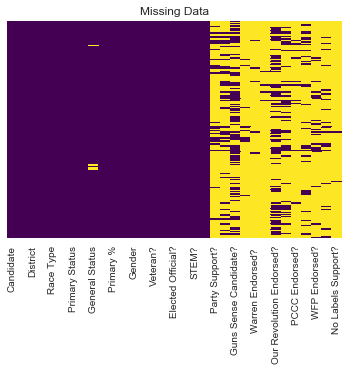

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [6]:
dem_primary_2018=df[['Candidate', 'State', 'District', 'Office Type',
        'Partisan Lean', 'Primary %', 'Won Primary','Gender', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?','Obama Alum?']]

In [9]:
dem_primary_2018.head()

,Candidate,State,District,Office Type,Partisan Lean,Primary %,Won Primary,Gender,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,-28.879999,3.42,No,Male,Nonwhite,Yes,No,No,No,No,No
1,Christopher Countryman,AL,Governor of Alabama,Governor,-28.879999,1.74,No,Male,White,No,Yes,No,No,No,No
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,-28.879999,3.27,No,Male,White,Yes,No,No,No,No,No
3,James C. Fields,AL,Governor of Alabama,Governor,-28.879999,8.00,No,Male,Nonwhite,Yes,No,Yes,No,No,No
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,-28.879999,28.98,No,Female,White,No,No,Yes,No,No,No


Text(0.5, 1.0, 'Missing Data')

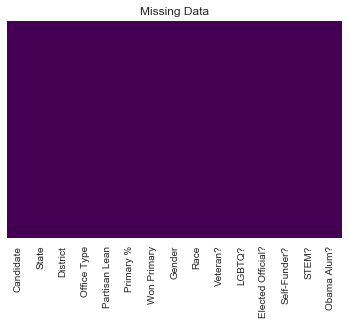

In [13]:
sns.heatmap(dem_primary_2018.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [160]:
len(dem_primary_2018.State.unique())

37

In [130]:
dem_primary_2018.corr(method='pearson', min_periods=0)

,Partisan Lean,Primary %
Partisan Lean,1.000000,-0.328335
Primary %,-0.328335,1.000000


In [106]:
df2=pd.read_csv('2016-precinct-house.csv',encoding="ISO-8859-1")

/anaconda3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'Missing Data')

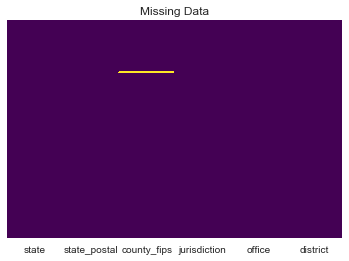

In [138]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [139]:
df2=df2.dropna()

Text(0.5, 1.0, 'Missing Data')

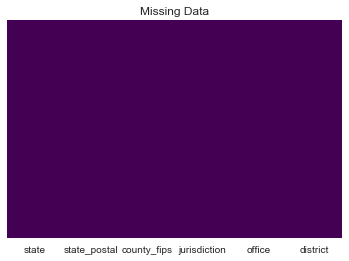

In [140]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [108]:
df2.columns

Index(['year', 'stage', 'special', 'state', 'state_postal', 'state_fips',
       'state_icpsr', 'county_name', 'county_fips', 'county_ansi',
       'county_lat', 'county_long', 'jurisdiction', 'precinct', 'candidate',
       'candidate_normalized', 'office', 'district', 'writein', 'party',
       'mode', 'votes', 'candidate_opensecrets', 'candidate_wikidata',
       'candidate_party', 'candidate_last', 'candidate_first',
       'candidate_middle', 'candidate_full', 'candidate_suffix',
       'candidate_nickname', 'candidate_fec', 'candidate_fec_name',
       'candidate_google', 'candidate_govtrack', 'candidate_icpsr',
       'candidate_maplight'],
      dtype='object')

In [109]:
df2.state_postal.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [110]:
df2.shape

(1127515, 37)

In [111]:
df2=df2[['state','state_postal','county_fips','jurisdiction','office','district']]

In [112]:
 df2=df2[df2.state_postal.isin(['AL', 'AR', 'AZ', 'CA', 'CO', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'MD', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'WA', 'WV'])]

In [113]:
df2=df2[df2.office.isin(['US House'])]

In [114]:
df2=df2.drop_duplicates()

In [115]:
df2.head()

,state,state_postal,county_fips,jurisdiction,office,district
0,Alabama,AL,1001.0,Autauga,US House,2.0
95,Alabama,AL,1003.0,Baldwin,US House,1.0
287,Alabama,AL,1005.0,Barbour,US House,2.0
377,Alabama,AL,1007.0,Bibb,US House,6.0
427,Alabama,AL,1009.0,Blount,US House,4.0


In [143]:
df2.district=df2.district.astype(int)

In [145]:
df2.district=df2.district.astype(str)

In [156]:
df2.county_fips=df2.county_fips.astype(int)

In [149]:
df2['House District'] = df2[['office', 'district']].apply(lambda x: ' '.join(x), axis=1)

In [152]:
df2=df2.drop(columns=['office','district'])

In [157]:
df2.head()

,state,state_postal,county_fips,jurisdiction,House District
0,Alabama,AL,1001,Autauga,US House 2
95,Alabama,AL,1003,Baldwin,US House 1
287,Alabama,AL,1005,Barbour,US House 2
377,Alabama,AL,1007,Bibb,US House 6
427,Alabama,AL,1009,Blount,US House 4


In [159]:
df.head(20)

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Walt Maddox,AL,Governor of Alabama,Governor,Regular,6/5/18,Advanced,None,On the Ballot,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Lizzetta Hill McConnell,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Lost,None,None,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Robert Kennedy Jr.,AL,U.S. House Alabama District 1,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Audri Scott Williams,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Lost,None,None,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tabitha Isner,AL,U.S. House Alabama District 2,Representative,Regular,6/5/18,Advanced,None,On the Ballot,-33.080002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
